In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
#Importing data from bigquery

from google.cloud import bigquery
client = bigquery.Client(project='npro-413820')

In [ ]:
sql_query2 = """
Select *
from npro-413820.Brooklyn_2018_2022.Brooklyn18_22
"""

In [ ]:
df = client.query(sql_query2).to_dataframe()

In [ ]:
df.count

<bound method DataFrame.count of          borough   contributing_factor_vehicle_1  \
0       BROOKLYN                     Unspecified   
1       BROOKLYN           Following Too Closely   
2       BROOKLYN                    Unsafe Speed   
3       BROOKLYN         Outside Car Distraction   
4       BROOKLYN                Brakes Defective   
...          ...                             ...   
165797  BROOKLYN  Driver Inattention/Distraction   
165798  BROOKLYN  Driver Inattention/Distraction   
165799  BROOKLYN                Steering Failure   
165800  BROOKLYN  Driver Inattention/Distraction   
165801  BROOKLYN  Driver Inattention/Distraction   

         contributing_factor_vehicle_2 contributing_factor_vehicle_3  \
0                          Unspecified                          None   
1                          Unspecified                          None   
2       Passing or Lane Usage Improper                          None   
3                          Unspecified                

In [ ]:
# Check missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
contributing_factor_vehicle_1       825
contributing_factor_vehicle_2     33032
contributing_factor_vehicle_3    153031
contributing_factor_vehicle_4    162318
contributing_factor_vehicle_5    164689
cross_street_name                 66541
latitude                           3573
longitude                          3573
location                           3573
off_street_name                   99270
on_street_name                    66532
vehicle_type_code1                 1720
vehicle_type_code2                47662
vehicle_type_code_3              153781
vehicle_type_code_4              162458
vehicle_type_code_5              164722
zip_code                              2
dtype: int64


In [ ]:
df['contributing_factor_vehicle_1'] = df['contributing_factor_vehicle_1'].replace(['80','1'], 'Unknown')
df = df.dropna(subset=['contributing_factor_vehicle_1'])

In [ ]:
# Replace '80' and '1' with 'Unknown' in contributing_factor_vehicle
df['contributing_factor_vehicle_2'] = df['contributing_factor_vehicle_2'].replace(['80', '1'], 'Unknown')

df['contributing_factor_vehicle_2'] = df['contributing_factor_vehicle_2'].fillna('Unspecified')

df['contributing_factor_vehicle_3'] = df['contributing_factor_vehicle_3'].replace(['80', '1'], 'Unknown')

df['contributing_factor_vehicle_3'] = df['contributing_factor_vehicle_3'].fillna('None')

df['contributing_factor_vehicle_4'] = df['contributing_factor_vehicle_4'].replace(['80', '1'], 'Unknown')

df['contributing_factor_vehicle_4'] = df['contributing_factor_vehicle_4'].fillna('None')

df['contributing_factor_vehicle_5'] = df['contributing_factor_vehicle_5'].replace(['80', '1'], 'Unknown')

df['contributing_factor_vehicle_5'] = df['contributing_factor_vehicle_5'].fillna('None')

<ipython-input-8-bcc9b83fb549>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contributing_factor_vehicle_2'] = df['contributing_factor_vehicle_2'].replace(['80', '1'], 'Unknown')
<ipython-input-8-bcc9b83fb549>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contributing_factor_vehicle_2'] = df['contributing_factor_vehicle_2'].fillna('Unspecified')
<ipython-input-8-bcc9b83fb549>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [ ]:
#df['cross_street_name'].fillna('OTHER', inplace=True)

#df['off_street_name'].fillna('OTHER', inplace=True)

#df['on_street_name'].fillna('OTHER', inplace=True)

In [ ]:
df['cross_street_name'].fillna('OTHER', inplace=True)

<ipython-input-9-9aec8fffe80b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cross_street_name'].fillna('OTHER', inplace=True)


In [ ]:
count_other = (df['cross_street_name'] == 'OTHER').sum()
count_other

66274

In [ ]:
df['off_street_name'].isna().sum()

98712

In [ ]:
df['off_street_name'].fillna('OTHER', inplace=True)

<ipython-input-12-585e67f6e2e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['off_street_name'].fillna('OTHER', inplace=True)


In [ ]:
count_off_st_other = (df['off_street_name'] == 'OTHER').sum()
count_off_st_other

98712

In [ ]:
df['on_street_name'].fillna('OTHER', inplace=True)

<ipython-input-14-9e8c3a096ac1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['on_street_name'].fillna('OTHER', inplace=True)


In [ ]:
count_on_st_other = (df['on_street_name'] == 'OTHER').sum()
count_on_st_other

66265

In [ ]:
df['vehicle_type_code1'].fillna('Unknown', inplace=True)

df['vehicle_type_code2'].fillna('Unknown', inplace=True)

df['vehicle_type_code_3'].fillna('None', inplace=True)

df['vehicle_type_code_4'].fillna('None', inplace=True)

df['vehicle_type_code_5'].fillna('None', inplace=True)

<ipython-input-16-be16d4da59c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_type_code1'].fillna('Unknown', inplace=True)
<ipython-input-16-be16d4da59c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_type_code2'].fillna('Unknown', inplace=True)
<ipython-input-16-be16d4da59c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_type_code_3'].fillna('None', inplace=True)
<ipython-input-16-be16d4da5

In [ ]:
df = df.dropna(subset=['zip_code'])

In [ ]:
df = df.dropna(subset=['location'])

In [ ]:
df = df.dropna(subset=['location'])

In [ ]:
df = df[df['latitude'] != 0.000000]

In [ ]:
df = df[df['longitude'] != 0.000000]

In [ ]:
df

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
15,BROOKLYN,Traffic Control Disregarded,Unspecified,None,None,None,HOYT STREET,2018-10-30 14:30:00,40.683956,-73.989560,...,0,OTHER,BALTIC STREET,4014806,Pick-up Truck,Pick-up Truck,None,None,None,11201
16,BROOKLYN,Unspecified,Unspecified,None,None,None,KANE STREET,2018-02-28 17:00:00,40.685450,-73.994415,...,0,OTHER,COURT STREET,3854061,Pick-up Truck,Unknown,None,None,None,11201
17,BROOKLYN,Following Too Closely,Unspecified,None,None,None,OTHER,2022-05-24 08:34:00,40.685802,-73.990220,...,0,88 WYCKOFF STREET,OTHER,4531089,Station Wagon/Sport Utility Vehicle,Bus,None,None,None,11201
18,BROOKLYN,Failure to Yield Right-of-Way,Unspecified,None,None,None,WYCKOFF STREET,2020-11-10 08:35:00,40.686080,-73.990910,...,0,OTHER,SMITH STREET,4369156,Box Truck,Bike,None,None,None,11201
19,BROOKLYN,Unsafe Lane Changing,Unspecified,None,None,None,OTHER,2018-07-18 21:10:00,40.686283,-73.994026,...,0,226 COURT STREET,OTHER,3944066,Sedan,Sedan,None,None,None,11201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165797,BROOKLYN,Driver Inattention/Distraction,Unspecified,None,None,None,BERRY STREET,2018-08-09 18:20:00,40.722458,-73.954790,...,0,OTHER,NORTH 14 STREET,3959287,Station Wagon/Sport Utility Vehicle,Unknown,None,None,None,11249
165798,BROOKLYN,Driver Inattention/Distraction,Unspecified,None,None,None,OTHER,2020-08-31 18:35:00,40.722527,-73.957880,...,0,94 NORTH 12 STREET,OTHER,4344149,Sedan,Unknown,None,None,None,11249
165799,BROOKLYN,Steering Failure,Unspecified,Unspecified,None,None,OTHER,2022-02-03 01:25:00,40.722843,-73.955420,...,0,200 NORTH 14 STREET,OTHER,4499576,Sedan,Van,Sedan,None,None,11249
165800,BROOKLYN,Driver Inattention/Distraction,Unspecified,None,None,None,GATES AVENUE,2019-11-12 21:53:00,40.701046,-73.910680,...,0,OTHER,SAINT NICHOLAS AVENUE,4240036,Sedan,Sedan,None,None,None,11385


In [ ]:
len(df)

160512

In [ ]:
#FINAL CLEANED CSV

In [ ]:
df.to_csv('11_data.csv', index=False)


In [ ]:
from google.colab import files


files.download('11_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

#xyz = pd.read_csv('fm_data.csv')
xyz = df.copy()

# Load the first part of the weather data
weather_part1 = pd.read_csv('weather1.csv')

# Load the second part of the weather data
weather_part2 = pd.read_csv('weather2.csv')

# Concatenate the two parts vertically to combine them
weather_data = pd.concat([weather_part1, weather_part2], ignore_index=True)

# Print information about the combined_weather_data DataFrame
print("Combined Weather Data Info:")
print(weather_data.info())



Combined Weather Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1826 non-null   object 
 1   datetime          1826 non-null   object 
 2   tempmax           1826 non-null   float64
 3   tempmin           1826 non-null   float64
 4   temp              1826 non-null   float64
 5   feelslikemax      1826 non-null   float64
 6   feelslikemin      1826 non-null   float64
 7   feelslike         1826 non-null   float64
 8   dew               1826 non-null   float64
 9   humidity          1826 non-null   float64
 10  precip            1826 non-null   float64
 11  precipprob        1826 non-null   int64  
 12  precipcover       1826 non-null   float64
 13  preciptype        1098 non-null   object 
 14  snow              1826 non-null   float64
 15  snowdepth         1826 non-null   float64
 16  windgust      

In [ ]:

xyz.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160512 entries, 15 to 165801
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   borough                        160512 non-null  object        
 1   contributing_factor_vehicle_1  160512 non-null  object        
 2   contributing_factor_vehicle_2  160512 non-null  object        
 3   contributing_factor_vehicle_3  160512 non-null  object        
 4   contributing_factor_vehicle_4  160512 non-null  object        
 5   contributing_factor_vehicle_5  160512 non-null  object        
 6   cross_street_name              160512 non-null  object        
 7   timestamp                      160512 non-null  datetime64[ns]
 8   latitude                       160512 non-null  float64       
 9   longitude                      160512 non-null  float64       
 10  location                       160512 non-null  object        
 11 

In [ ]:
# Convert the timestamp column to datetime format
xyz['timestamp'] = pd.to_datetime(xyz['timestamp'])


new_xyz = xyz.copy()

# Extract year, month, day of the week, and hour using .loc to avoid the warning
new_xyz.loc[:, 'year'] = new_xyz['timestamp'].dt.year
new_xyz.loc[:, 'month'] = new_xyz['timestamp'].dt.month
new_xyz.loc[:, 'day_of_week'] = new_xyz['timestamp'].dt.day_name()
new_xyz.loc[:, 'hour'] = new_xyz['timestamp'].dt.hour
new_xyz.loc[:, 'date'] = new_xyz['timestamp'].dt.date

# Display the updated DataFrame
display(new_xyz.head())

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,year,month,day_of_week,hour,date
15,BROOKLYN,Traffic Control Disregarded,Unspecified,None,None,None,HOYT STREET,2018-10-30 14:30:00,40.683956,-73.989560,...,Pick-up Truck,None,None,None,11201,2018,10,Tuesday,14,2018-10-30
16,BROOKLYN,Unspecified,Unspecified,None,None,None,KANE STREET,2018-02-28 17:00:00,40.685450,-73.994415,...,Unknown,None,None,None,11201,2018,2,Wednesday,17,2018-02-28
17,BROOKLYN,Following Too Closely,Unspecified,None,None,None,OTHER,2022-05-24 08:34:00,40.685802,-73.990220,...,Bus,None,None,None,11201,2022,5,Tuesday,8,2022-05-24
18,BROOKLYN,Failure to Yield Right-of-Way,Unspecified,None,None,None,WYCKOFF STREET,2020-11-10 08:35:00,40.686080,-73.990910,...,Bike,None,None,None,11201,2020,11,Tuesday,8,2020-11-10
19,BROOKLYN,Unsafe Lane Changing,Unspecified,None,None,None,OTHER,2018-07-18 21:10:00,40.686283,-73.994026,...,Sedan,None,None,None,11201,2018,7,Wednesday,21,2018-07-18


In [ ]:
new_xyz

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,year,month,day_of_week,hour,date
15,BROOKLYN,Traffic Control Disregarded,Unspecified,None,None,None,HOYT STREET,2018-10-30 14:30:00,40.683956,-73.989560,...,Pick-up Truck,None,None,None,11201,2018,10,Tuesday,14,2018-10-30
16,BROOKLYN,Unspecified,Unspecified,None,None,None,KANE STREET,2018-02-28 17:00:00,40.685450,-73.994415,...,Unknown,None,None,None,11201,2018,2,Wednesday,17,2018-02-28
17,BROOKLYN,Following Too Closely,Unspecified,None,None,None,OTHER,2022-05-24 08:34:00,40.685802,-73.990220,...,Bus,None,None,None,11201,2022,5,Tuesday,8,2022-05-24
18,BROOKLYN,Failure to Yield Right-of-Way,Unspecified,None,None,None,WYCKOFF STREET,2020-11-10 08:35:00,40.686080,-73.990910,...,Bike,None,None,None,11201,2020,11,Tuesday,8,2020-11-10
19,BROOKLYN,Unsafe Lane Changing,Unspecified,None,None,None,OTHER,2018-07-18 21:10:00,40.686283,-73.994026,...,Sedan,None,None,None,11201,2018,7,Wednesday,21,2018-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165797,BROOKLYN,Driver Inattention/Distraction,Unspecified,None,None,None,BERRY STREET,2018-08-09 18:20:00,40.722458,-73.954790,...,Unknown,None,None,None,11249,2018,8,Thursday,18,2018-08-09
165798,BROOKLYN,Driver Inattention/Distraction,Unspecified,None,None,None,OTHER,2020-08-31 18:35:00,40.722527,-73.957880,...,Unknown,None,None,None,11249,2020,8,Monday,18,2020-08-31
165799,BROOKLYN,Steering Failure,Unspecified,Unspecified,None,None,OTHER,2022-02-03 01:25:00,40.722843,-73.955420,...,Van,Sedan,None,None,11249,2022,2,Thursday,1,2022-02-03
165800,BROOKLYN,Driver Inattention/Distraction,Unspecified,None,None,None,GATES AVENUE,2019-11-12 21:53:00,40.701046,-73.910680,...,Sedan,None,None,None,11385,2019,11,Tuesday,21,2019-11-12


In [ ]:
new_xyz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160512 entries, 15 to 165801
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   borough                        160512 non-null  object        
 1   contributing_factor_vehicle_1  160512 non-null  object        
 2   contributing_factor_vehicle_2  160512 non-null  object        
 3   contributing_factor_vehicle_3  160512 non-null  object        
 4   contributing_factor_vehicle_4  160512 non-null  object        
 5   contributing_factor_vehicle_5  160512 non-null  object        
 6   cross_street_name              160512 non-null  object        
 7   timestamp                      160512 non-null  datetime64[ns]
 8   latitude                       160512 non-null  float64       
 9   longitude                      160512 non-null  float64       
 10  location                       160512 non-null  object        
 11 

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1826 non-null   object        
 1   datetime          1826 non-null   datetime64[ns]
 2   tempmax           1826 non-null   float64       
 3   tempmin           1826 non-null   float64       
 4   temp              1826 non-null   float64       
 5   feelslikemax      1826 non-null   float64       
 6   feelslikemin      1826 non-null   float64       
 7   feelslike         1826 non-null   float64       
 8   dew               1826 non-null   float64       
 9   humidity          1826 non-null   float64       
 10  precip            1826 non-null   float64       
 11  precipprob        1826 non-null   int64         
 12  precipcover       1826 non-null   float64       
 13  preciptype        1098 non-null   object        
 14  snow              1826 n

In [ ]:
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], errors='coerce')


In [ ]:
import pandas as pd



# Convert 'date' in new_xyz to datetime format
new_xyz['date'] = pd.to_datetime(new_xyz['date'], errors='coerce')

# Convert 'datetime' in weather_data to datetime format
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], errors='coerce')

# Merge
xyz_weather = pd.merge(new_xyz, weather_data[['datetime', 'icon']], left_on='date', right_on='datetime', how='left')

# Drop the duplicate 'datetime' column that came from weather_data
xyz_weather = xyz_weather.drop(columns='datetime')

# Rename the 'icon' column to 'weather'
xyz_weather = xyz_weather.rename(columns={'icon': 'weather'})


print(xyz_weather.head())


    borough  contributing_factor_vehicle_1 contributing_factor_vehicle_2  \
0  BROOKLYN    Traffic Control Disregarded                   Unspecified   
1  BROOKLYN                    Unspecified                   Unspecified   
2  BROOKLYN          Following Too Closely                   Unspecified   
3  BROOKLYN  Failure to Yield Right-of-Way                   Unspecified   
4  BROOKLYN           Unsafe Lane Changing                   Unspecified   

  contributing_factor_vehicle_3 contributing_factor_vehicle_4  \
0                          None                          None   
1                          None                          None   
2                          None                          None   
3                          None                          None   
4                          None                          None   

  contributing_factor_vehicle_5 cross_street_name           timestamp  \
0                          None       HOYT STREET 2018-10-30 14:30:00   
1     

In [ ]:
xyz_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160512 entries, 0 to 160511
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   borough                        160512 non-null  object        
 1   contributing_factor_vehicle_1  160512 non-null  object        
 2   contributing_factor_vehicle_2  160512 non-null  object        
 3   contributing_factor_vehicle_3  160512 non-null  object        
 4   contributing_factor_vehicle_4  160512 non-null  object        
 5   contributing_factor_vehicle_5  160512 non-null  object        
 6   cross_street_name              160512 non-null  object        
 7   timestamp                      160512 non-null  datetime64[ns]
 8   latitude                       160512 non-null  float64       
 9   longitude                      160512 non-null  float64       
 10  location                       160512 non-null  object        
 11  

In [ ]:
xyz_weather.to_csv('11_xyz_weather.csv')
from google.colab import files


files.download('11_xyz_weather.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

# Save DataFrame to Excel
excel_file_path = 'output.xlsx'
xyz_weather.to_excel(excel_file_path)  # Omitting index=False to include headers

# Download the Excel file in Google Colab
files.download(excel_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
xyz_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160512 entries, 0 to 160511
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   borough                        160512 non-null  object        
 1   contributing_factor_vehicle_1  160512 non-null  object        
 2   contributing_factor_vehicle_2  160512 non-null  object        
 3   contributing_factor_vehicle_3  160512 non-null  object        
 4   contributing_factor_vehicle_4  160512 non-null  object        
 5   contributing_factor_vehicle_5  160512 non-null  object        
 6   cross_street_name              160512 non-null  object        
 7   timestamp                      160512 non-null  datetime64[ns]
 8   latitude                       160512 non-null  float64       
 9   longitude                      160512 non-null  float64       
 10  location                       160512 non-null  object        
 11  

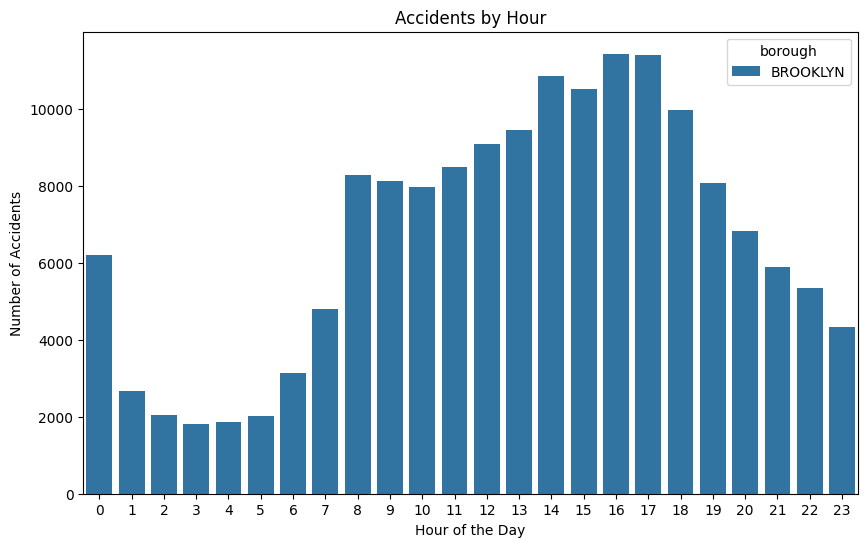

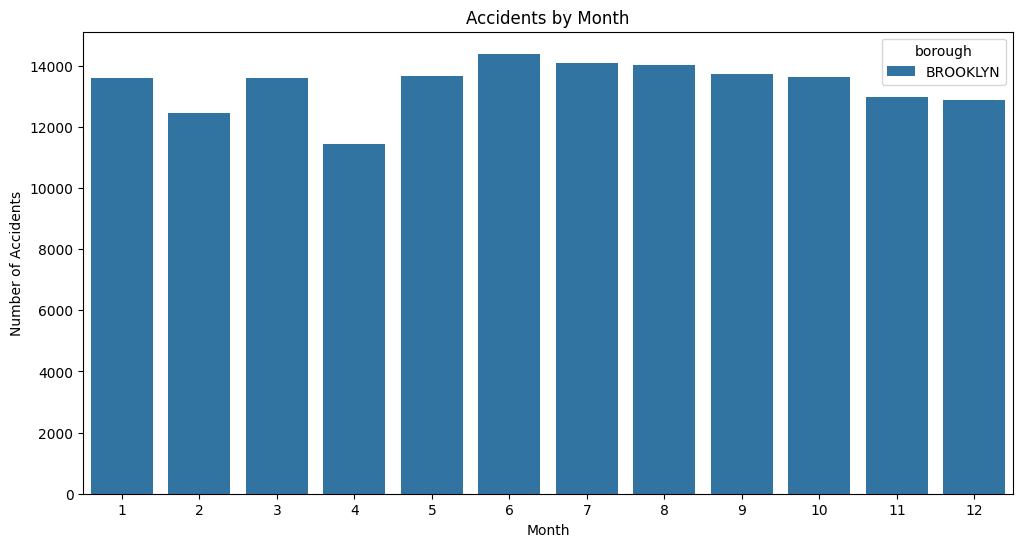

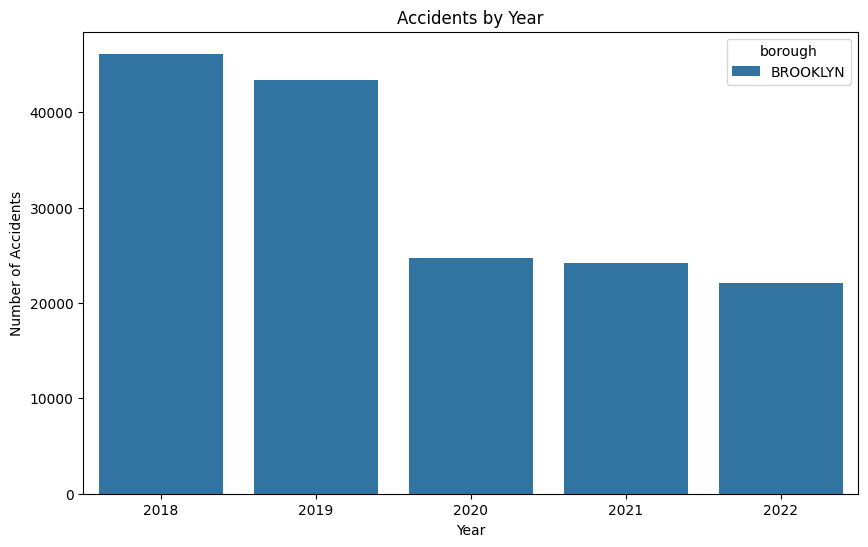

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hourly distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=xyz_weather, hue='borough')
plt.title('Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

# Monthly distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=xyz_weather, hue='borough')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

# Yearly distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=xyz_weather, hue='borough')
plt.title('Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()


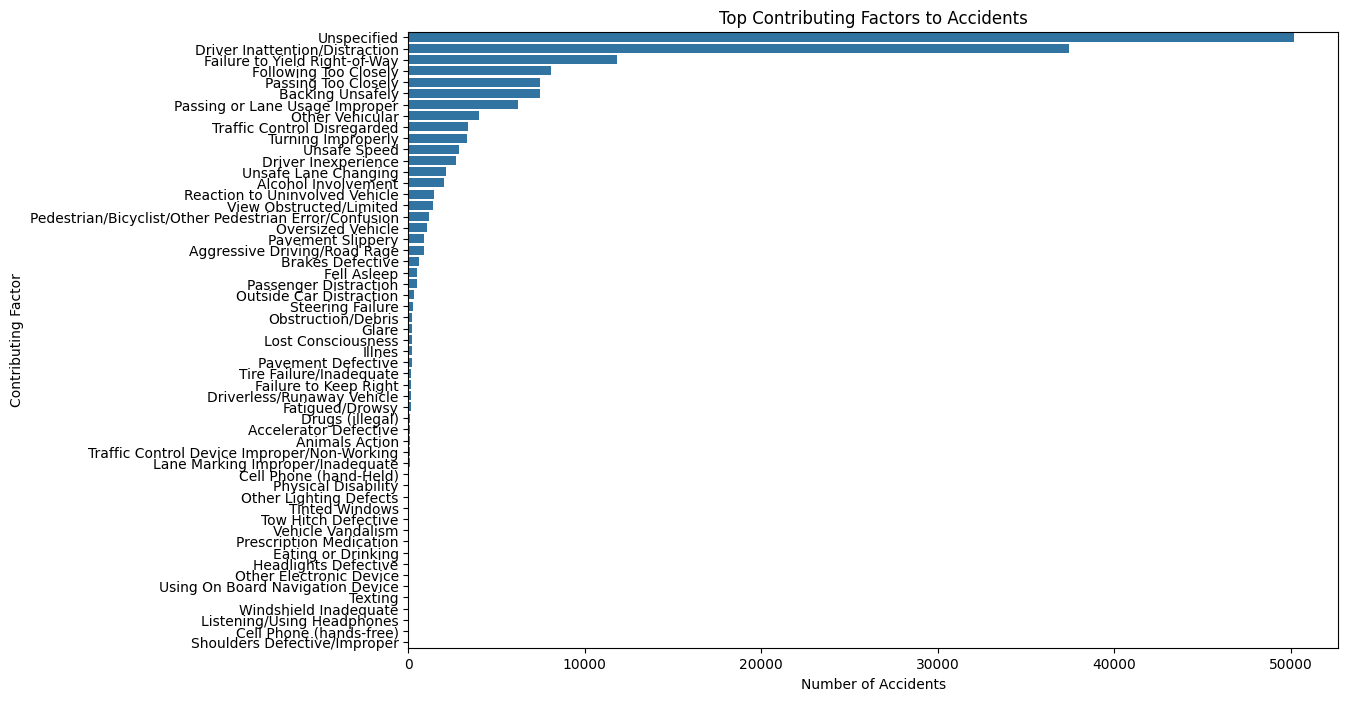

In [ ]:
# Contributing factors
contributing_factors = ['contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
                         'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4',
                         'contributing_factor_vehicle_5']

plt.figure(figsize=(12, 8))
sns.countplot(y='contributing_factor_vehicle_1', data=xyz_weather, order=xyz_weather['contributing_factor_vehicle_1'].value_counts().index)
plt.title('Top Contributing Factors to Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Contributing Factor')
plt.show()


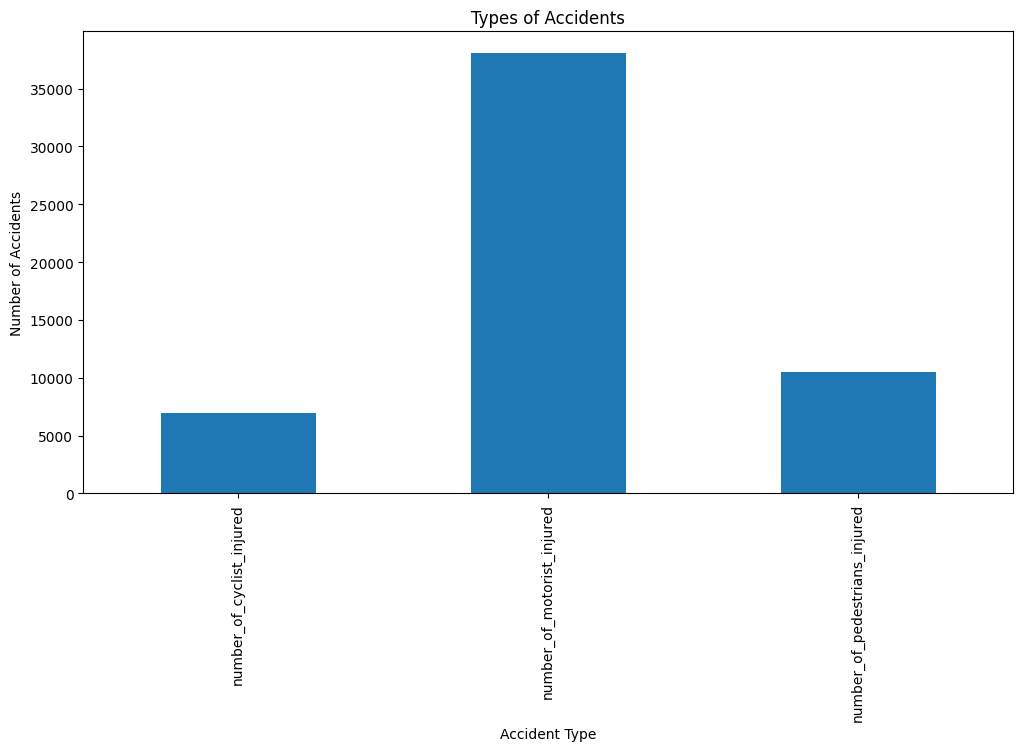

In [ ]:
# Types of accidents
accident_types = ['number_of_cyclist_injured', 'number_of_motorist_injured', 'number_of_pedestrians_injured']

plt.figure(figsize=(12, 6))
xyz_weather[accident_types].sum().plot(kind='bar')
plt.title('Types of Accidents')
plt.xlabel('Accident Type')
plt.ylabel('Number of Accidents')
plt.show()


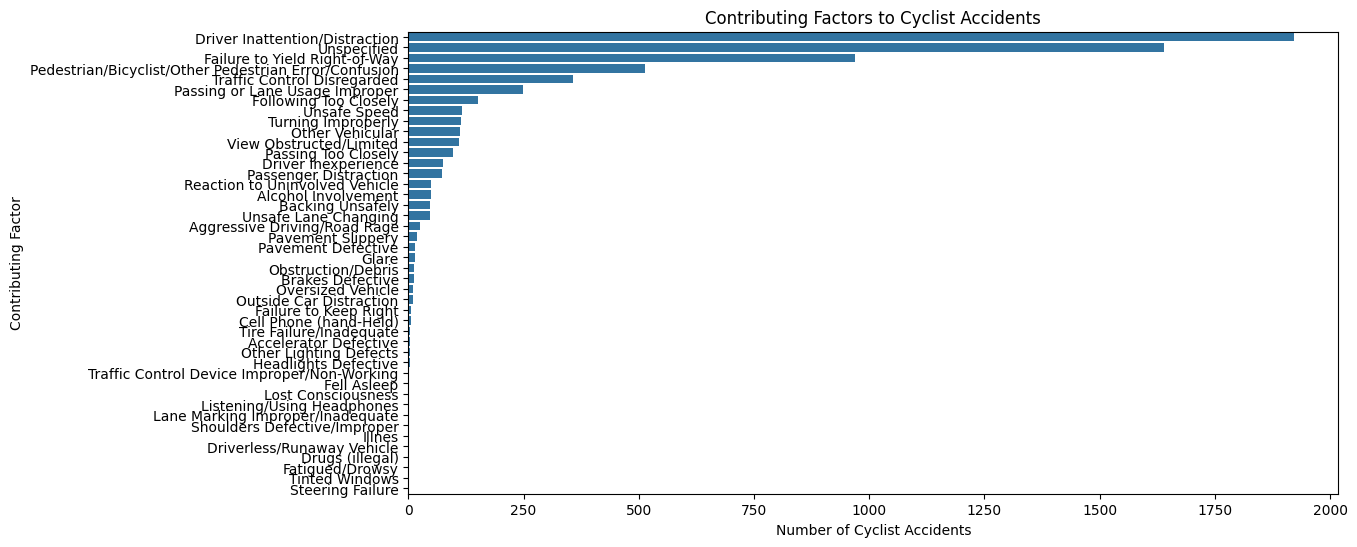

In [ ]:
# Cyclist accidents
cyclist_accidents = xyz_weather[xyz_weather['number_of_cyclist_injured'] > 0]

# Contributing factors to cyclist accidents
plt.figure(figsize=(12, 6))
sns.countplot(y='contributing_factor_vehicle_1', data=cyclist_accidents,
              order=cyclist_accidents['contributing_factor_vehicle_1'].value_counts().index)
plt.title('Contributing Factors to Cyclist Accidents')
plt.xlabel('Number of Cyclist Accidents')
plt.ylabel('Contributing Factor')
plt.show()


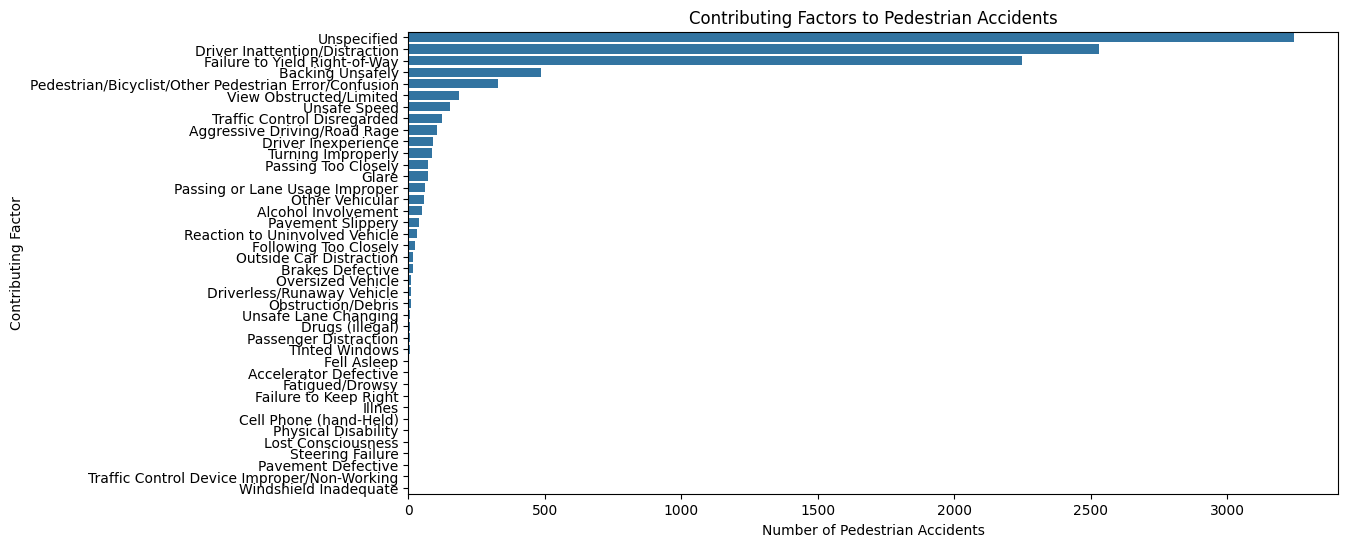

In [ ]:
# Pedestrian accidents
pedestrian_accidents = xyz_weather[xyz_weather['number_of_pedestrians_injured'] > 0]

# Contributing factors to pedestrian accidents
plt.figure(figsize=(12, 6))
sns.countplot(y='contributing_factor_vehicle_1', data=pedestrian_accidents,
              order=pedestrian_accidents['contributing_factor_vehicle_1'].value_counts().index)
plt.title('Contributing Factors to Pedestrian Accidents')
plt.xlabel('Number of Pedestrian Accidents')
plt.ylabel('Contributing Factor')
plt.show()


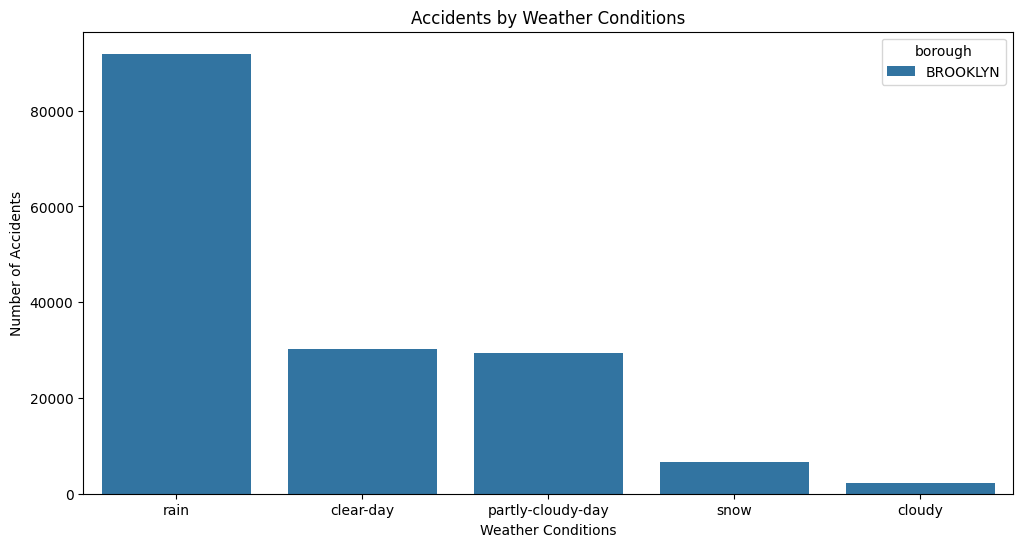

In [ ]:
# Weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='weather', data=xyz_weather, hue='borough')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()


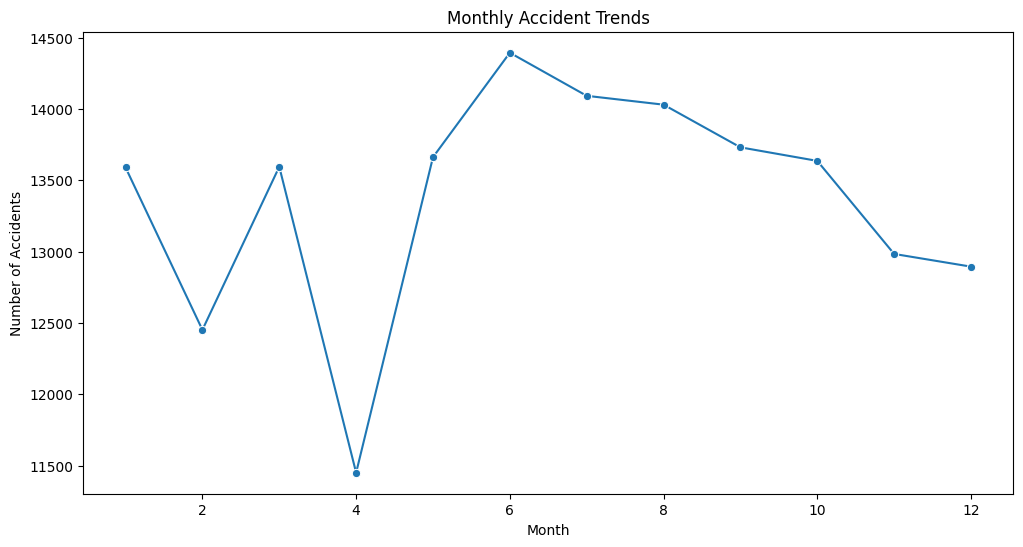

In [ ]:
# Monthly accident trends
monthly_accidents = xyz_weather.groupby('month')['unique_key'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='unique_key', data=monthly_accidents, marker='o')
plt.title('Monthly Accident Trends')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


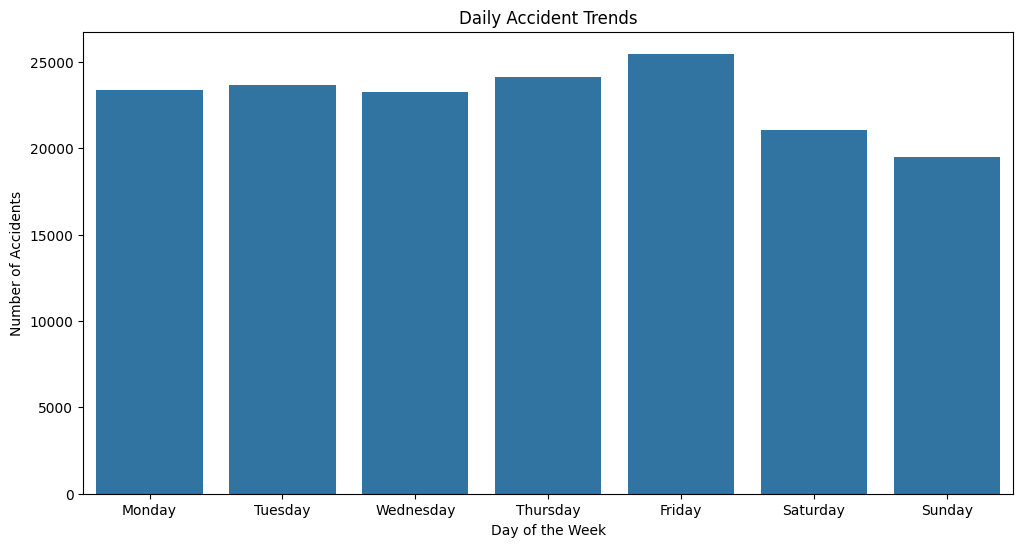

In [ ]:
# Daily accident trends
daily_accidents = xyz_weather.groupby('day_of_week')['unique_key'].count().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='unique_key', data=daily_accidents, order=days_order)
plt.title('Daily Accident Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


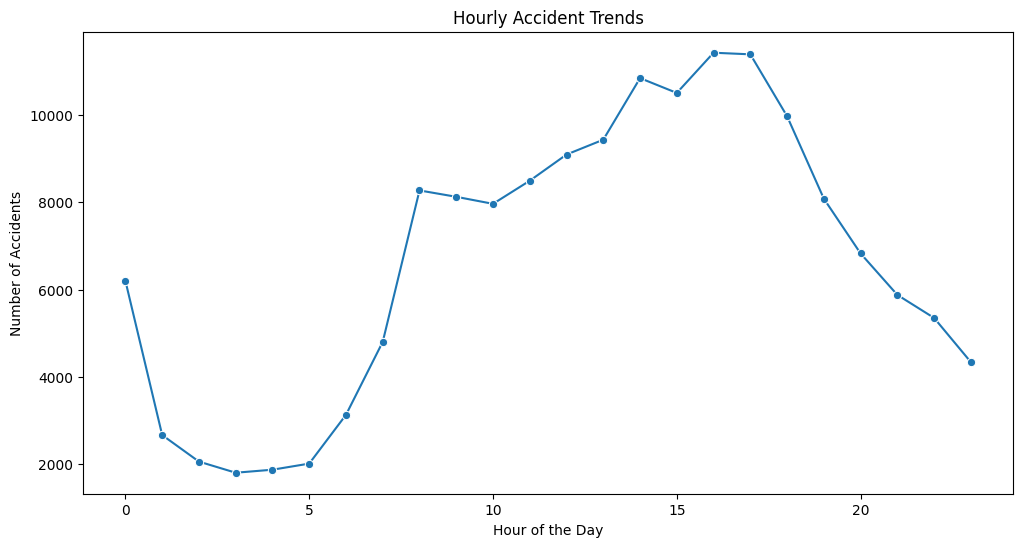

In [ ]:
# Hourly accident trends
hourly_accidents = xyz_weather.groupby('hour')['unique_key'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='unique_key', data=hourly_accidents, marker='o')
plt.title('Hourly Accident Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()


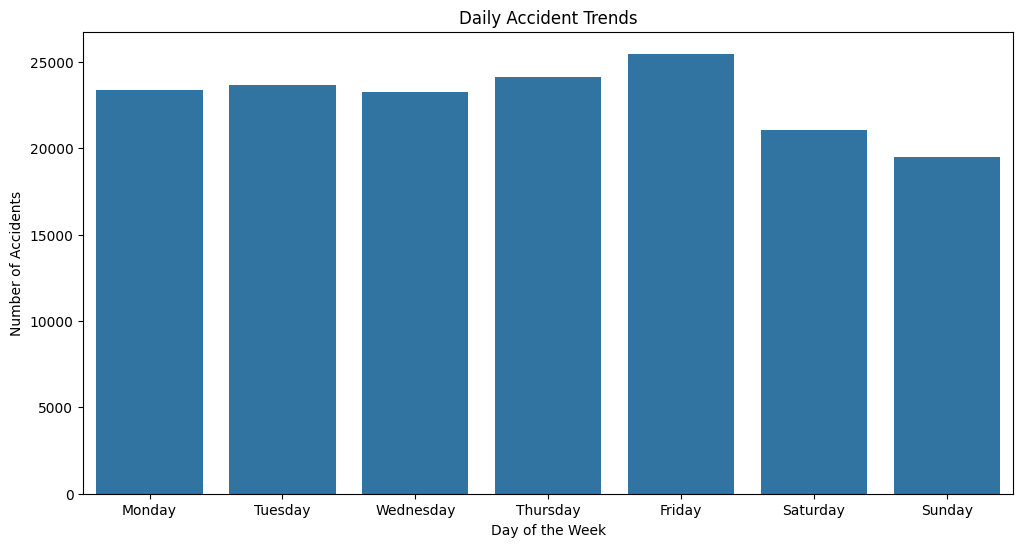

In [ ]:
# Daily accident trends
daily_accidents = xyz_weather.groupby('day_of_week')['unique_key'].count().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='unique_key', data=daily_accidents, order=days_order)
plt.title('Daily Accident Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


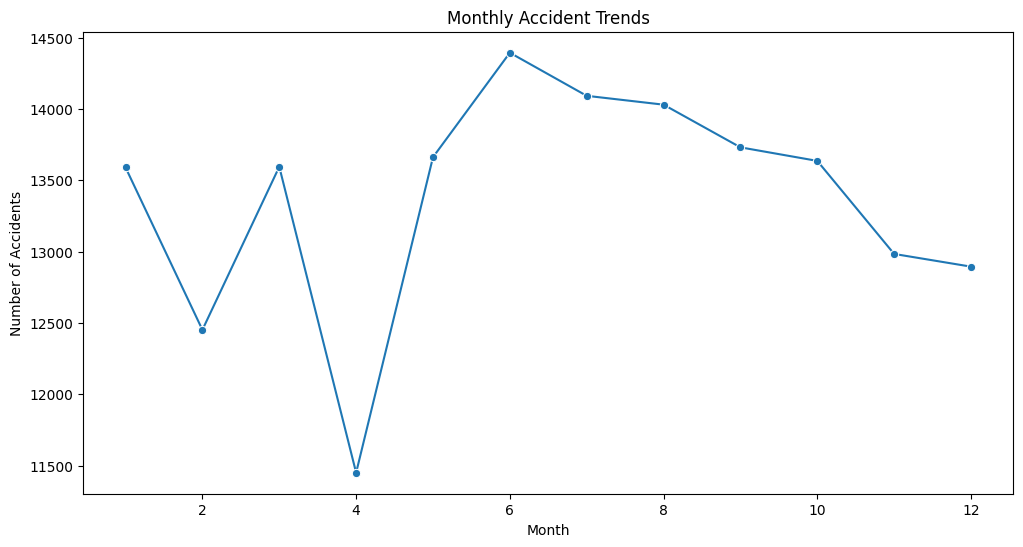

In [ ]:
# Monthly accident trends
monthly_accidents = xyz_weather.groupby('month')['unique_key'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='unique_key', data=monthly_accidents, marker='o')
plt.title('Monthly Accident Trends')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

